<a href="https://colab.research.google.com/github/Proberto2410/IGTI-Bootcamp-Module-1-Machine-Learning-Analist/blob/master/Challenge_of_the_Module_1_Bootcamp_IGTI_Machine_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Notebook refers to the First Challenge at IGTI Bootcamp Machine Learning July, 2020

# The objective of the exercise is to evaluate the following concetps worked on the Module 1:
1. EDA-Exploratory Data Analysis
2. Pre Processing of Data
3. Models Analysis


In [ ]:
#import the libraries
import pandas as pd # library used to work with dataframes
import numpy as np # library used in the treatment of matrices and vectors
import seaborn as sn # library used to plot graphics in a more "elegant" format
import matplotlib.pyplot as plt # library used to plot the graphs

In [ ]:
from google.colab import files # library used to upload data to google colab
uploaded = files.upload()


Saving comp_bikes_mod.csv to comp_bikes_mod.csv


In [ ]:
dataset_bikes=pd.read_csv('comp_bikes_mod.csv') # dataframe loading
dataset_bikes.head(10) # showing the first 10 rows of the dataframe

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0000,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
5,6.0,2011-01-01,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0
6,7.0,2011-01-01,1.0,0.0,1.0,NaN,0.0,6.0,0.0,1.0,0.22,0.2727,NaN,NaN,2.0,0.0,2.0
7,8.0,2011-01-01,1.0,0.0,1.0,7.0,0.0,6.0,0.0,NaN,0.20,0.2576,0.86,0.0000,NaN,2.0,3.0
8,9.0,2011-01-01,1.0,0.0,1.0,8.0,0.0,NaN,0.0,NaN,0.24,0.2879,0.75,0.0000,1.0,7.0,8.0
9,10.0,2011-01-01,1.0,0.0,NaN,9.0,0.0,6.0,0.0,1.0,NaN,0.3485,0.76,0.0000,8.0,6.0,14.0


In [ ]:
print('Dataframe Dimension: {}'.format(dataset_bikes.shape)) 

Dataframe Dimension: (17379, 17)


In [ ]:
dataset_bikes.info() # showing the characteristics of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [ ]:
print('Existing dataset dtypes: \n{}'.format(dataset_bikes.dtypes.value_counts()))

Existing dataset dtypes: 
float64    16
object      1
dtype: int64


In [ ]:
print('Existing dataset dtypes: \n{}'.format(dataset_bikes.dtypes.nunique()))

Existing dataset dtypes: 
2


In [ ]:
print("Proportion of null values for the Variable 'temp': {}%".format((len(dataset_bikes['temp'])/dataset_bikes.isnull().sum()['temp'])))

Proportion of null values for the Variable 'temp': 9.999424626006904%


In [ ]:
len(dataset_bikes['temp'])/dataset_bikes.isnull().sum()['temp']

9.999424626006904

In [ ]:
dataset_bikes.isnull().sum()

instant       1738
dteday        1738
season        1738
yr            1738
mnth          1738
hr            1738
holiday       1738
weekday       1738
workingday    1738
weathersit    1738
temp          1738
atemp         1738
hum           1738
windspeed     1738
casual        1738
registered    1738
cnt           1738
dtype: int64

In [ ]:
dir(pd)

In [ ]:
# removing the lines containing the date as null
dataset_bikes.dropna(subset=['dteday'],inplace=True)

In [ ]:
dataset_bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     14060 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      14061 non-null  float64
 3   yr          14076 non-null  float64
 4   mnth        14062 non-null  float64
 5   hr          14068 non-null  float64
 6   holiday     14076 non-null  float64
 7   weekday     14078 non-null  float64
 8   workingday  14097 non-null  float64
 9   weathersit  14078 non-null  float64
 10  temp        14066 non-null  float64
 11  atemp       14076 non-null  float64
 12  hum         14070 non-null  float64
 13  windspeed   14082 non-null  float64
 14  casual      14071 non-null  float64
 15  registered  14090 non-null  float64
 16  cnt         14079 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.1+ MB


In [ ]:
n_instances, n_attributes=dataset_bikes.shape # checking the number of instances and attributes
print('Number of Instances and Attributes ({},{}'.format(n_instances, n_attributes))

Number of Instances and Attributes (15641,17


In [ ]:
# finding statistics description for variables
dataset_bikes.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14061.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,2.507930,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,1.110674,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
# transforming the season column (stations) on categorical
dataset_bikes['season']=dataset_bikes['season'].astype('category')

In [ ]:
# checking the columns
dataset_bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     14060 non-null  float64 
 1   dteday      15641 non-null  object  
 2   season      14061 non-null  category
 3   yr          14076 non-null  float64 
 4   mnth        14062 non-null  float64 
 5   hr          14068 non-null  float64 
 6   holiday     14076 non-null  float64 
 7   weekday     14078 non-null  float64 
 8   workingday  14097 non-null  float64 
 9   weathersit  14078 non-null  float64 
 10  temp        14066 non-null  float64 
 11  atemp       14076 non-null  float64 
 12  hum         14070 non-null  float64 
 13  windspeed   14082 non-null  float64 
 14  casual      14071 non-null  float64 
 15  registered  14090 non-null  float64 
 16  cnt         14079 non-null  float64 
dtypes: category(1), float64(15), object(1)
memory usage: 2.0+ MB


In [ ]:
print('There are {} different stations in the dataset'.format(dataset_bikes['season'].nunique()))

There are 4 different stations in the dataset


In [ ]:
dataset_bikes['season'].unique()

[1.0, NaN, 2.0, 3.0, 4.0]
Categories (4, float64): [1.0, 2.0, 3.0, 4.0]

In [ ]:
# converting the data string to the date type
dataset_bikes['dteday']=pd.to_datetime(dataset_bikes.dteday)

In [ ]:
dataset_bikes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     14060 non-null  float64       
 1   dteday      15641 non-null  datetime64[ns]
 2   season      14061 non-null  category      
 3   yr          14076 non-null  float64       
 4   mnth        14062 non-null  float64       
 5   hr          14068 non-null  float64       
 6   holiday     14076 non-null  float64       
 7   weekday     14078 non-null  float64       
 8   workingday  14097 non-null  float64       
 9   weathersit  14078 non-null  float64       
 10  temp        14066 non-null  float64       
 11  atemp       14076 non-null  float64       
 12  hum         14070 non-null  float64       
 13  windspeed   14082 non-null  float64       
 14  casual      14071 non-null  float64       
 15  registered  14090 non-null  float64       
 16  cnt         14079 non-

In [ ]:
# finding the highest date value in the dataset
print('Largest date in the dataset {}'.format(dataset_bikes['dteday'].max()))

Largest date in the dataset 2012-12-31 00:00:00


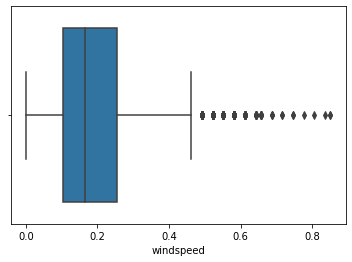

In [ ]:
# checking for outliers in the 'windspeed' variable
ax = sns.boxplot(x=dataset_bikes['windspeed'])
ax

In [ ]:
# selecting the columns "season", "temp", "atemp", "hum", "windspeed", "cnt"
dataset_bikes_filtered=dataset_bikes[['season', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

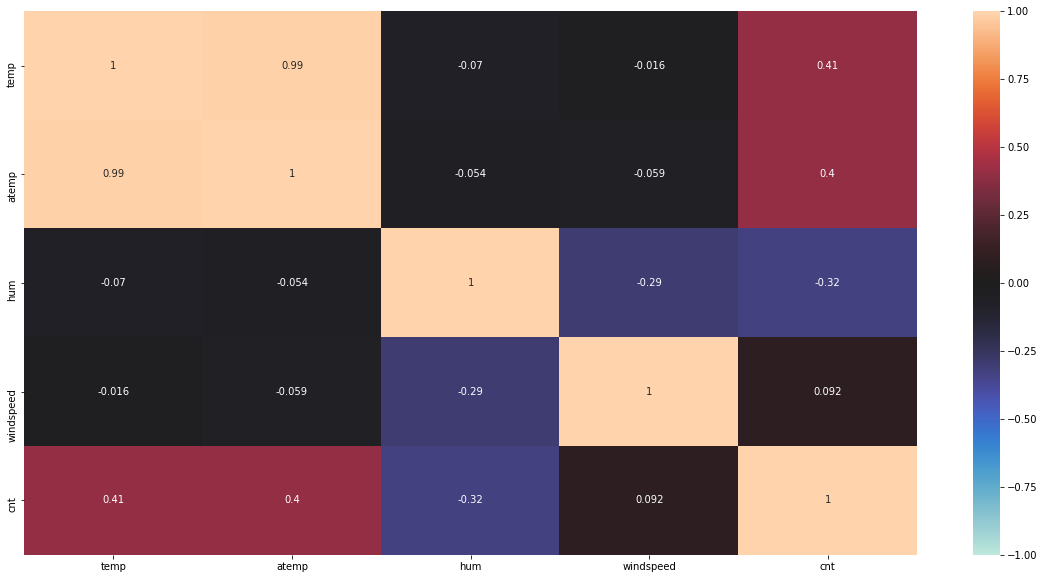

In [ ]:
# performing the correlation matrix plot
plt.figure(figsize=(20, 10))
correlation_matrix = dataset_bikes_filtered.corr() # building the correlation matrix
sn.heatmap(correlation_matrix, annot=True,vmin=-1, vmax=1,center= 0) # plotting the correlation matrix
plt.show()

In [ ]:
#substituting the average value for the "hum", "cnt", "casual" columns
dataset_bikes_regression=dataset_bikes[['hum', 'cnt', 'casual']]  # filtering the required values (selecting the variables 'hum', 'cnt', 'casual')
dataset_bikes_regression.fillna(dataset_bikes_regression.mean(), inplace=True) # applying the modification to the null values
dataset_bikes_regression.isnull().sum() #evaluating whether the values have been filled

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


hum       0
cnt       0
casual    0
dtype: int64

In [ ]:
#selecting variables for regression models
input_regression=dataset_bikes_regression[['hum', 'casual']] # independent variables
output_regression=dataset_bikes_regression['cnt'] # dependent variables

In [ ]:
input_regression.shape

(15641, 2)

In [ ]:
# imports the linear regression model
from sklearn.linear_model import LinearRegression

In [ ]:
#Performs the construction of the regression model
reg= LinearRegression()
regression= reg.fit (input_regression,output_regression) # finds the coefficients (performs the regression)

In [ ]:
# performs the forecast
forecast=reg.predict(input_regression)

In [ ]:
# model analysis
from sklearn.metrics import r2_score # method for calculating R2 (coefficient of determination)

In [ ]:
# found parameters
print('Y = {}X1 + {}X2 + {}'.format(reg.coef_[0],reg.coef_[1],reg.intercept_))

R_2 = r2_score(output_regression, forecast) # performs the R2 calculation
print('Coefficient of Determination (R2):', R_2)

Y = -99.75012327908327X1 + 2.215121974254656X2 + 173.29337505135578
Coefficient of Determination (R2): 0.4059859251122173


In [ ]:
# importing the decision tree as a regressor
from sklearn.tree import DecisionTreeRegressor

regressor_tree=DecisionTreeRegressor() # defines the object for the decision tree as a regressor
regressor_tree.fit(input_regression, output_regression) # applies regression

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# performs the forecast
forecast_tree=regressor_tree.predict(input_regression)

In [ ]:
# found parameters
R_2 = r2_score(output_regression, forecast_tree) # performs the R2 calculation

print('Coefficient of Determination (R2) to the Tree:', R_2)

Coefficient of Determination (R2) to the Tree: 0.7098339715834964


In [ ]:
# plotting the decisions made by the decision tree
from sklearn import tree # importing the library into the decision trees
import pydotplus # library used as an interface to plot decision tree decisions
dot_data = tree.export_graphviz(regressor_tree, out_file=None)
graphic = pydotplus.graph_from_dot_data(dot_data)
graphic.write_pdf("bikeshare.pdf")

True